# Hiding your Scraping

There are some things that we can do to make it more difficult for websites to detect that you are scraping from them:


In [1]:
#imports
import requests
from bs4 import BeautifulSoup
import numpy as np

## Using Proxies

Proxies are a very useful tool to avoid being detected by websites for scraping too many pages in a short space of time. They allow us to pass our request to a website through an intermediate server so to the website owner, the request looks to come from the remote server rather than you. 

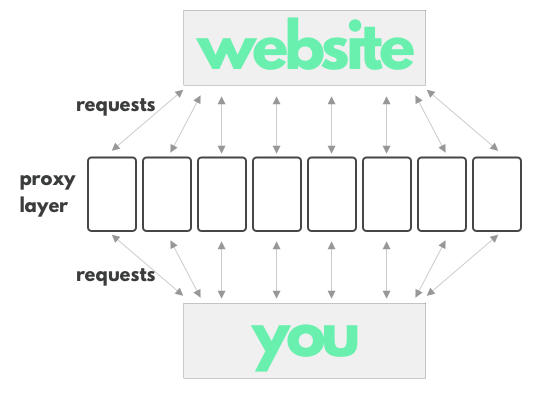

Obviously there is a trade off here in that you will increase the time taken for each request cycle, as the data has to be sent a bit further round the internet, but it should make it a little more difficult for the website to restrict your scraping. 

You may also find that the website already knows that the proxy a request is coming from is not a legitimate request and refuses the connection. Never mind, Next!


In [3]:
# Where to get the list of proxies from
proxies_url = 'https://www.sslproxies.org/'
r = requests.get(proxies_url)

In [4]:
#parse the page and take all the ip addresses and ports for each proxy listed
soup = BeautifulSoup(r.text, 'html.parser')
proxies_table = soup.find(id='proxylisttable')

proxies = []
for i, row in enumerate(proxies_table.tbody.find_all('tr')):
    ip_host = row.find_all('td')[0].string+ ":" + row.find_all('td')[1].string
    proxies.append({
      "http" :   row.find_all('td')[0].string+ ":" + row.find_all('td')[1].string,
    
    })

In [5]:
# pick a random proxy from the 100, and use it to make the request
proxy = np.random.choice(proxies)

r = requests.get("http://www.generalassemb.ly",proxies=proxy)

In [6]:
print(proxy)

{'http': '181.112.145.206:53281'}


### This method as a python Class
There's a good downloadable class for this, which will add a lot more functionality: https://github.com/rootVIII/proxy_requests

## Faking your UserAgent

Whenever your browser makes a request to get a webpage, it announces itself to the server and tells the server what kind of browser it is. if the server sees exactly the same user agent in a short space of time, they could get suspicious. We could therefore announce ourselves as a different agent each request to make this more difficult to track.

In [7]:
#!pip install fake_useragent
# https://pypi.org/project/fake-useragent/

from fake_useragent import UserAgent
ua = UserAgent()

print(ua.random)

Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.3319.102 Safari/537.36


the ua.random function will generate a random user agent string based on real world browser usage statistics

If we wanted to add this to the above example with proxies, we would modify each request to the target website

In [8]:
headers = {'User-Agent': ua.random}
proxy = np.random.choice(proxies)
r = requests.get("http://www.generalassemb.ly",proxies=proxy,headers = headers)


In [9]:
print(proxy)
print(headers)

{'http': '186.248.170.82:53281'}
{'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1664.3 Safari/537.36'}
